# Creating dataset for initial training of siamese NN

## 0. Import libraries

In [1]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import random
from PIL import Image

## 1. Adding paths and directories

In [2]:
PATH = dict()
PATH['main'] = 'C:\\Users\\javie\\Python\\TFOD\\siamese_face_recognition'
PATH['download'] = os.path.join(PATH['main'],'dataset\\raw')
PATH['raw'] = os.path.join(PATH['download'],'lfw')
PATH['train'] = os.path.join(PATH['main'],'dataset\\train')
PATH['test'] = os.path.join(PATH['main'],'dataset\\test')

## 2. Download and uncompresse files

In [3]:
#Donwload from: http://vis-www.cs.umass.edu/lfw/#download
#os.system('tar -xf {}'.format(os.path.join(PATH['download'],'lfw.tgz')))

## 3. Getting information about the dataset

In [4]:
#Creating a list of files inside every character and the number of files of each directory.
# data structure:
# dir: raw/lfw
# -> dir: Characters, E.g.:Aaron_Eckhart
# -> -> file: picture, E.g.:Aaron_Eckhart_picture01.png

directories = os.listdir(PATH['raw'])
files = list()
n_files = list()
for dir in directories:
    file = os.listdir(os.path.join(PATH['raw'],dir))
    n_files.append(len(file))
    for f in file:
        files.append(os.path.join(PATH['raw'], dir, f))

In [5]:
n_files_array = np.array(n_files)

In [6]:
uniq, counting = np.unique(n_files_array,return_counts=True)
print('Number of pictures inside the characters dir:')
print(uniq)
print('Number of times a dir with N pictures is present:')
print(counting)
print('The number of folder with diferent number of pictures:')
print(counting.shape[0])

Number of pictures inside the characters dir:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37
  39  41  42  44  48  49  52  53  55  60  71  77 109 121 144 236 530]
Number of times a dir with N pictures is present:
[4069  779  291  187  112   55   39   33   26   15   16   10   11   10
   11    3    8    5    7    5    4    5    3    3    1    2    1    2
    2    2    2    3    3    1    1    1    2    2    2    1    1    1
    2    1    1    1    1    1    1    1    1    1    1]
The number of folder with diferent number of pictures:
53


In [7]:
total_per_class = uniq*counting

print('Meaningfull information:')
print('This is the total number of picture in the dataset:', total_per_class[:].sum())
print('This is the total number of pictures to be a positive sample: ', total_per_class[1:].sum())
print('This is the total number of character with just 1 picture (negative samples): ', total_per_class[0])
print()
print('This conclude, in order to balance the dataset it is necesary to double the negative examples')

Meaningfull information:
This is the total number of picture in the dataset: 13233
This is the total number of pictures to be a positive sample:  9164
This is the total number of character with just 1 picture (negative samples):  4069

This conclude, in order to balance the dataset it is necesary to double the negative examples


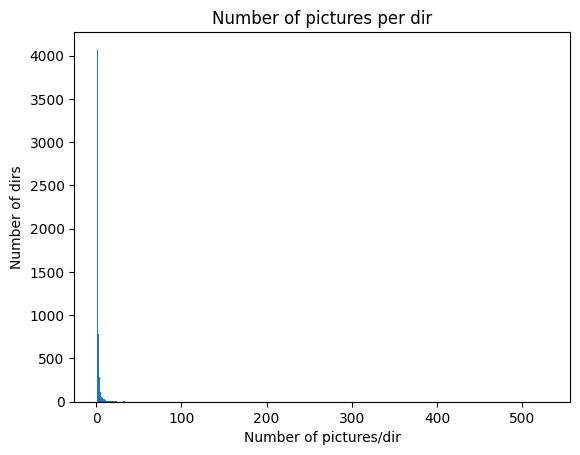

In [8]:
# The histograme of the distribution shows that the character use to have just a few pictures

plt.figure()
hist = plt.hist(uniq, bins=529, weights=counting)
plt.title('Number of pictures per dir')
plt.xlabel('Number of pictures/dir')
plt.ylabel('Number of dirs')
plt.show()

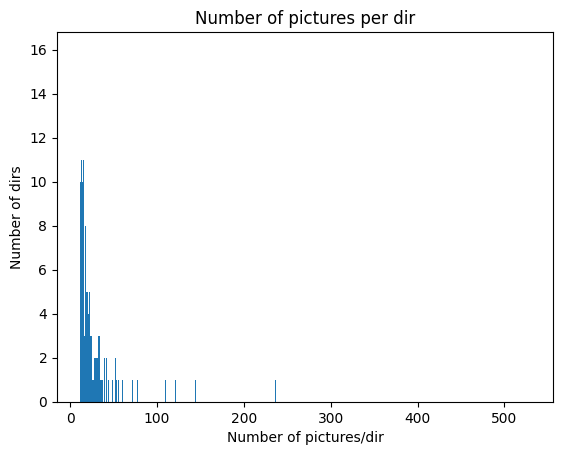

In [9]:
plt.figure()
hist = plt.hist(uniq[10:], bins=519, weights=counting[10:])
plt.title('Number of pictures per dir')
plt.xlabel('Number of pictures/dir')
plt.ylabel('Number of dirs')
plt.show()

## 4.Creating the algorithm to get the dataset

The dataset for Siamese neuronal network:
<ol>
    <li>The siamese nn has 2 inputs of 2 pictures and one output, if the 2 pictures correspond to the same person 1 or 0 when they are different people.</li>
    <li>Positive samples will be two pictures of the same person.</li>
    <li>Negative samples will be two pictures of different people.</li>
    <li>The 'true predictions' for the training will be an array with zeros and ones, 0 for negatives and 1 for positive.</li>
</ol>

Directives to create an efective algorithm in the dataset:
<ul>
    <li>Every folder with just one picture is going to be a negative example.</li>
    <li>Every negative example will be use twice with two different pictures in different folders to balance the dataset (same number of negative than positive samples).</li>
    <li>Every negative sample will be peer with two ramdom pictures of the list of pictures.</li>
    <li>Every folder with more of 1 picture will be use as positive sample</li>
    <li>The pictures for potive samples in every folder will be peer with the next one in the list of the folder to create the dataset.</li>
    <li>In case the pictures is the last in the list of the folder will be peer with the first one.</li>
    <li>In case the folder has just 2 pictures, there will not be repetition.</li>
</ul>



In [27]:
# files is a list of paths for every picture in order of extraction for every folder
# n_files is a list with the number of picures every folder

# Fix the ramdom number seed to generate always the same dataset
random.seed(13)

# Create the list of variables
positives = list()
negatives = list()
count = 0

for n, nf in enumerate(n_files):
    #generating 2 negative samples every time the dir has just 1 picture
    if nf == 1:
        iter = 0
        while iter <= 1:
            ram = random.randint(0, len(files)-1)
            if ram != count:
                negatives.append([files[count],files[ram]])
                iter += 1
    # Generating 1 positive sample every time the dir has 2 pictures
    elif nf == 2:
        positives.append([files[count], files[count+1]])
    # Generating N positive sample every time the dir has N pictures, N greater than 2
    else:
        for r in range(nf):
            if r != nf-1:
                positives.append([files[count+r], files[count+r+1]])
            else:
                positives.append([files[count+r], files[count]])
    count += nf



In [23]:
print('Positive samples length:', len(positives))
print('Negative samples length:', len(negatives))


Positive samples length: 8385
Negative samples length: 8138


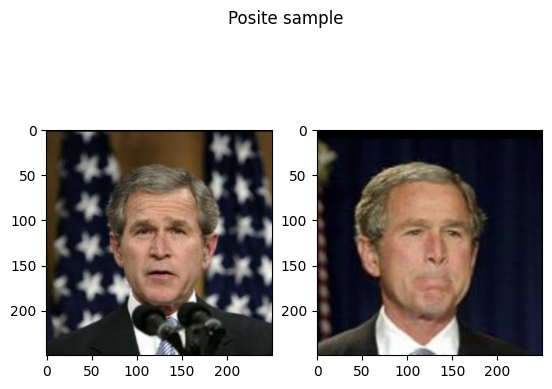

In [12]:
# Positive sample show
random.seed()
ram = random.randint(0,len(positives)-1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Posite sample')
ax1.imshow(Image.open(positives[ram][0]))
ax2.imshow(Image.open(positives[ram][1]))

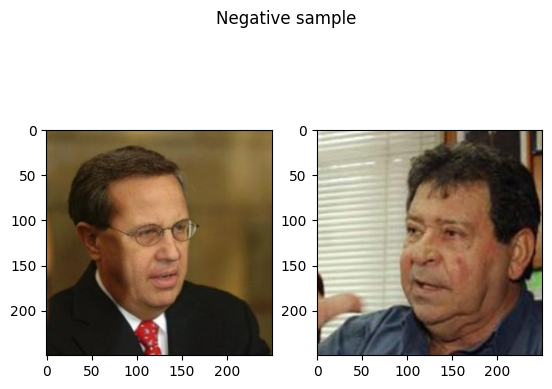

In [13]:
# Negative sample show
random.seed()
ram = random.randint(0,len(positives)-1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Negative sample')
ax1.imshow(Image.open(negatives[ram][0]))
ax2.imshow(Image.open(negatives[ram][1]))

## 5. Creating the tf.dataset

In [14]:
#  map(lambda x: tf.py_function(pascal_voc_to_dict,inp=[x],Tout=[tf.float32, tf.float32, tf.float32]),
#                            num_parallel_calls=tf.data.AUTOTUNE)
@tf.function
def preprocessing(x):
    x = tf.io.read_file(x)
    x = tf.io.decode_jpeg(x, channels=3)
    x = tf.cast(x, dtype=tf.float32)/255.0
    x = tf.image.resize(x, size=(105,105))
    return x

In [15]:
ds_positives = tf.data.Dataset.from_tensor_slices(positives)
ds_negatives = tf.data.Dataset.from_tensor_slices(negatives)

In [16]:
ds_positives = ds_positives.map(lambda x: (preprocessing(x[0]),preprocessing(x[1]), 1.0), num_parallel_calls=tf.data.AUTOTUNE)
ds_negatives = ds_negatives.map(lambda x: (preprocessing(x[0]),preprocessing(x[1]), 0.0), num_parallel_calls=tf.data.AUTOTUNE)

In [17]:
dataset = ds_positives.concatenate(ds_negatives)
dataset = dataset.shuffle(buffer_size=dataset.cardinality())

In [18]:
NUM_SAMPLES      = len(positives)+len(negatives)
TRAIN_SIZE       = int(0.7*NUM_SAMPLES)
TEST_SIZE        = int(0.2*NUM_SAMPLES)

train = dataset.take(TRAIN_SIZE)
test = dataset.skip(TRAIN_SIZE).take(TEST_SIZE)
val = dataset.skip(TRAIN_SIZE).skip(TEST_SIZE)

del ds_positives, ds_negatives, dataset

In [19]:
train = train.shuffle(10).batch(1)
# test = test.shuffle(10).batch(1)
# val = val.shuffle(10).batch(1)

In [20]:
train.as_numpy_iterator().next()[2]

array([1.], dtype=float32)

In [41]:
random.seed(13)

# Create the list of variables
positives = list()
negatives = list()
count = 0

for n, nf in enumerate(n_files):
    #generating 2 negative samples every time the dir has just 1 picture
    if nf == 1:
        iter = 0
        while iter <= 1:
            ram = random.randint(0, len(files)-1)
            if ram != count:
                negatives.append([files[count],files[ram],'0.0'])
                iter += 1
    # Generating 1 positive sample every time the dir has 2 pictures
    elif nf == 2:
        positives.append([files[count], files[count+1],'1.0'])
    # Generating N positive sample every time the dir has N pictures, N greater than 2
    else:
        for r in range(nf):
            if r != nf-1:
                positives.append([files[count+r], files[count+r+1],'1.0'])
            else:
                positives.append([files[count+r], files[count],'1.0'])
    count += nf
ds = positives + negatives

random.shuffle(ds)


In [46]:

print(ds[12])


['C:\\Users\\javie\\Python\\TFOD\\siamese_face_recognition\\dataset\\raw\\lfw\\Felix_Doh\\Felix_Doh_0001.jpg', 'C:\\Users\\javie\\Python\\TFOD\\siamese_face_recognition\\dataset\\raw\\lfw\\Gary_Sayler\\Gary_Sayler_0001.jpg', '0.0']


In [39]:
ds = tf.data.Dataset.from_tensor_slices(ds)



In [40]:
ds = ds.map(lambda x: (preprocessing(x[0]),preprocessing(x[1]), float(x[2])), num_parallel_calls=tf.data.AUTOTUNE)

train = ds.take(TRAIN_SIZE)
test = ds.skip(TRAIN_SIZE).take(TEST_SIZE)
val = ds.skip(TRAIN_SIZE).skip(TEST_SIZE)